In [1]:
#Importing all the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the dataset from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Checking the dimension of the train images
train_images.shape

(60000, 28, 28)

In [6]:
#Checking the dimension of the test images
test_images.shape

(10000, 28, 28)

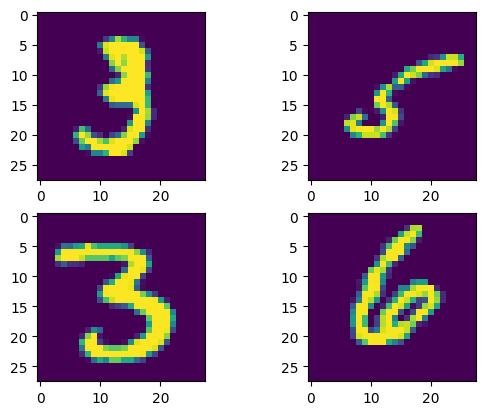

In [5]:
#Plotting some random input image
plt.subplot(221)
plt.imshow(train_images[10])
plt.subplot(222)
plt.imshow(train_images[11])
plt.subplot(223)
plt.imshow(train_images[12])
plt.subplot(224)
plt.imshow(train_images[13])
plt.show()

In [7]:
#Reshape the images to one channel from three channels for processing purpose
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [8]:
#Normalizing all the values in the range of 0 to 1 for less computation
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
#Model
model = Sequential()
model.add(Flatten())
model.add(Dense(784,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Train the model
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9014 - loss: 0.3226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9763 - loss: 0.0765
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9845 - loss: 0.0472
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9898 - loss: 0.0322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9921 - loss: 0.0253


In [13]:
#Test the model
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0906


[0.07356695830821991, 0.9783999919891357]

In [16]:
#Test the model for one sample image
test_images_copy = test_images.reshape(test_images.shape[0],28,28)

In [17]:
classification = model.predict(test_images_copy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
classification[6]

array([3.1509163e-11, 1.4897844e-08, 1.9945940e-06, 1.6768732e-08,
       9.4601154e-01, 5.5330620e-06, 6.0760425e-07, 2.3366885e-05,
       4.8072860e-02, 5.8840471e-03], dtype=float32)

In [19]:
print(np.argmax(classification[6]))

4


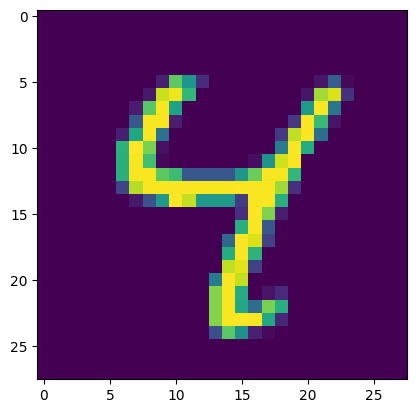

In [20]:
plt.imshow(test_images_copy[6])